# TASK 1 - CREDIT CARD FRAUD TRANSACTION DETECTION

__Name:   Navina.M<br>
  Domain: Data Science__

In [1]:
# Importing Dependenies:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import kaggle
import zipfile36 as zipfile
import warnings
warnings.filterwarnings('ignore')

In [2]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
zipfile_name = 'creditcardfraud.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

__Class__: <br>
0 --> Legit Transaction <br>
1 --> Fraudulent Transaction

In [11]:
# Distribution of Legit & Fraudulent Transactions:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

__Hence, it can be clearly seen that the "DATA SET IS HIGHLY IMBALANCED".__

# Dealing with Imbalanced data:

In [12]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [13]:
legit.shape, fraud.shape

((284315, 31), (492, 31))

In [14]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
# Comparing the values for both legit & fraud Transactions:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


__Undersampling - Building a sample dataset containing similar distribution of Legit & Fraudulent Transactions. <br>
Since the number of Fraudulent transactions is 492...__

In [17]:
legit_sample = legit.sample(n=492)

In [18]:
df1 = pd.concat([legit_sample, fraud], axis=0)

In [19]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
260873,159761.0,-5.055003,-12.541876,-6.908453,2.375298,-3.191285,0.454599,5.374913,-1.363433,-1.687870,...,2.195616,-1.745932,-3.433495,0.588559,-0.881401,0.589664,-0.852342,0.557107,3789.80,0
245597,152820.0,1.801430,0.097644,-0.420684,3.787639,0.456912,1.391565,-0.372614,0.328466,-0.391756,...,0.111775,0.518605,0.019829,0.237727,0.131745,0.113939,-0.007840,-0.047842,36.89,0
175768,122479.0,-1.042109,-1.405168,-0.058408,-2.483895,2.244787,0.415584,1.285391,-0.845543,-0.622843,...,0.198926,1.658039,0.385463,-1.599866,-0.486913,-0.261441,-0.842093,-0.454102,40.00,0
162662,115279.0,-0.743479,0.474773,0.714642,-0.047010,2.847280,4.559517,0.098784,1.052645,0.040837,...,-0.598209,-1.397913,-0.105400,0.628042,0.415781,-0.791232,0.202476,-0.082608,20.49,0
17417,28702.0,-1.601299,-0.703948,1.006456,-0.335370,1.675296,-1.496368,0.468670,0.013343,-0.871681,...,-0.084619,-0.963278,0.421128,-0.033216,-0.174557,-0.050167,-0.057137,0.138125,95.90,0


In [20]:
df1.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [21]:
df1.shape

(984, 31)

In [22]:
df1['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

__Now we can see that, the data is Undersampled and it is a Balanced Dataset.__

# Exploratory Data Analysis (EDA):

In [23]:
df1.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [24]:
df1['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [25]:
# Resetting the index if necessary:
df1.reset_index(drop=True, inplace=True)

__Reasons for resetting the Index:__ <br>
To ensure continuous indexing <br>
To maintain clean & continuous dataframe structure <br>

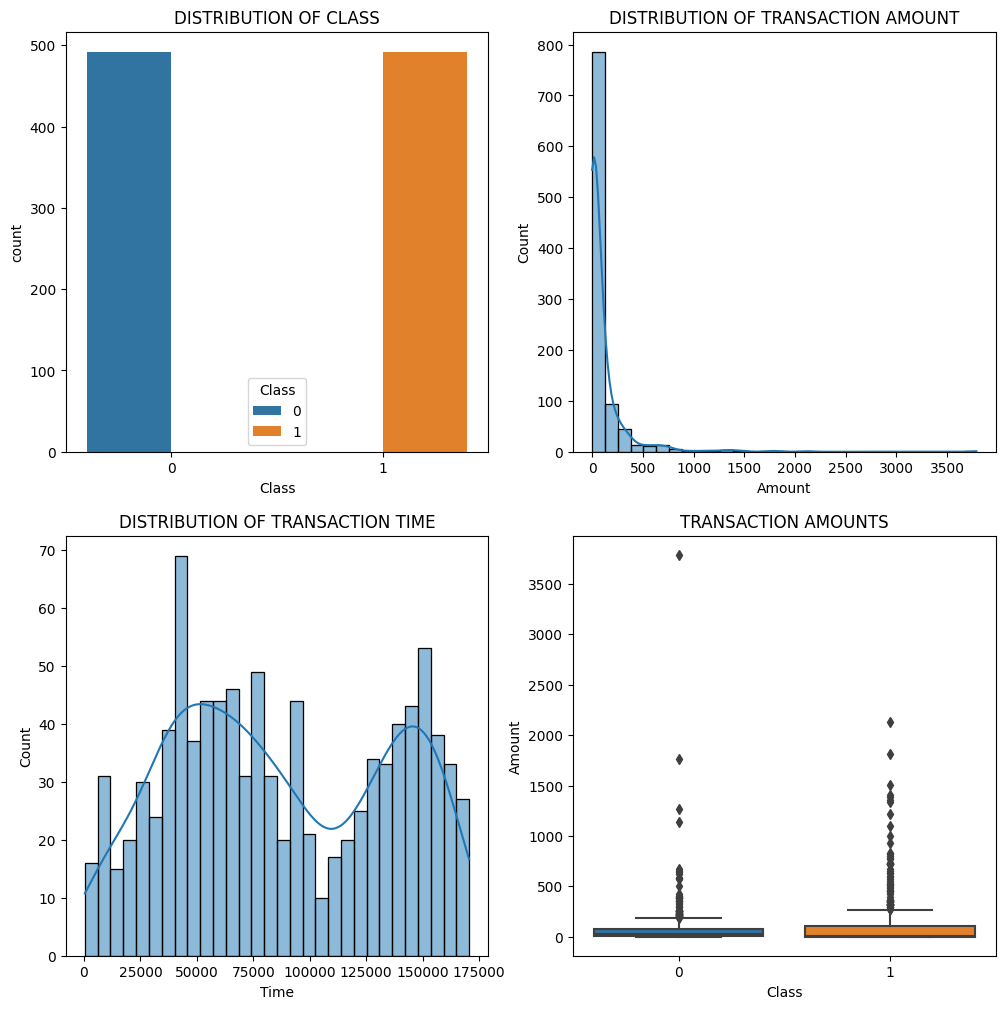

In [26]:
# Visualizing key statistics & distributions:
plt.figure(figsize=(12, 12))

# Class distribution (Countplot)
plt.subplot(2, 2, 1)
sns.countplot(x='Class', data=df1, hue='Class')
plt.title("DISTRIBUTION OF CLASS")

# Transaction amount distribution (Histogram with KDE)  
# kde - Kernel Density Estimate (Used to visualize the shape of the distribution )
plt.subplot(2, 2, 2)
sns.histplot(df1['Amount'], bins=30, kde=True)
plt.title("DISTRIBUTION OF TRANSACTION AMOUNT")

# Transaction time distribution (Histogram with KDE)
plt.subplot(2, 2, 3)
sns.histplot(df1['Time'], bins=30, kde=True)
plt.title("DISTRIBUTION OF TRANSACTION TIME")

# Boxplot of transaction amounts for each class
plt.subplot(2, 2, 4)
sns.boxplot(x='Class', y='Amount', data=df1)
plt.title("TRANSACTION AMOUNTS")

plt.show()

# Data Preprocessing:

__Since we encountered some outliers in the "Amount"...__

In [27]:
# Handling Outliers:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)

IQR = Q3 - Q1

In [28]:
IQR

71.565

In [29]:
low = Q1 - 1.5 * IQR
up = Q3 + 1.5 * IQR

In [30]:
low, up

(-101.7475, 184.5125)

In [31]:
df1 = df1[(df1['Amount'] >= low) & (df1['Amount'] <= up)]

In [32]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,152820.0,1.801430,0.097644,-0.420684,3.787639,0.456912,1.391565,-0.372614,0.328466,-0.391756,...,0.111775,0.518605,0.019829,0.237727,0.131745,0.113939,-0.007840,-0.047842,36.89,0
2,122479.0,-1.042109,-1.405168,-0.058408,-2.483895,2.244787,0.415584,1.285391,-0.845543,-0.622843,...,0.198926,1.658039,0.385463,-1.599866,-0.486913,-0.261441,-0.842093,-0.454102,40.00,0
3,115279.0,-0.743479,0.474773,0.714642,-0.047010,2.847280,4.559517,0.098784,1.052645,0.040837,...,-0.598209,-1.397913,-0.105400,0.628042,0.415781,-0.791232,0.202476,-0.082608,20.49,0
4,28702.0,-1.601299,-0.703948,1.006456,-0.335370,1.675296,-1.496368,0.468670,0.013343,-0.871681,...,-0.084619,-0.963278,0.421128,-0.033216,-0.174557,-0.050167,-0.057137,0.138125,95.90,0
5,9550.0,1.138400,0.035324,-0.107667,0.090731,0.143117,-0.340799,0.183940,-0.130753,0.943476,...,-0.442909,-1.208544,0.089969,-0.350830,0.097021,0.693169,-0.134318,-0.014121,64.62,0


In [33]:
df1.shape

(837, 31)

In [34]:
df1['Class'].value_counts()

Class
0    436
1    401
Name: count, dtype: int64

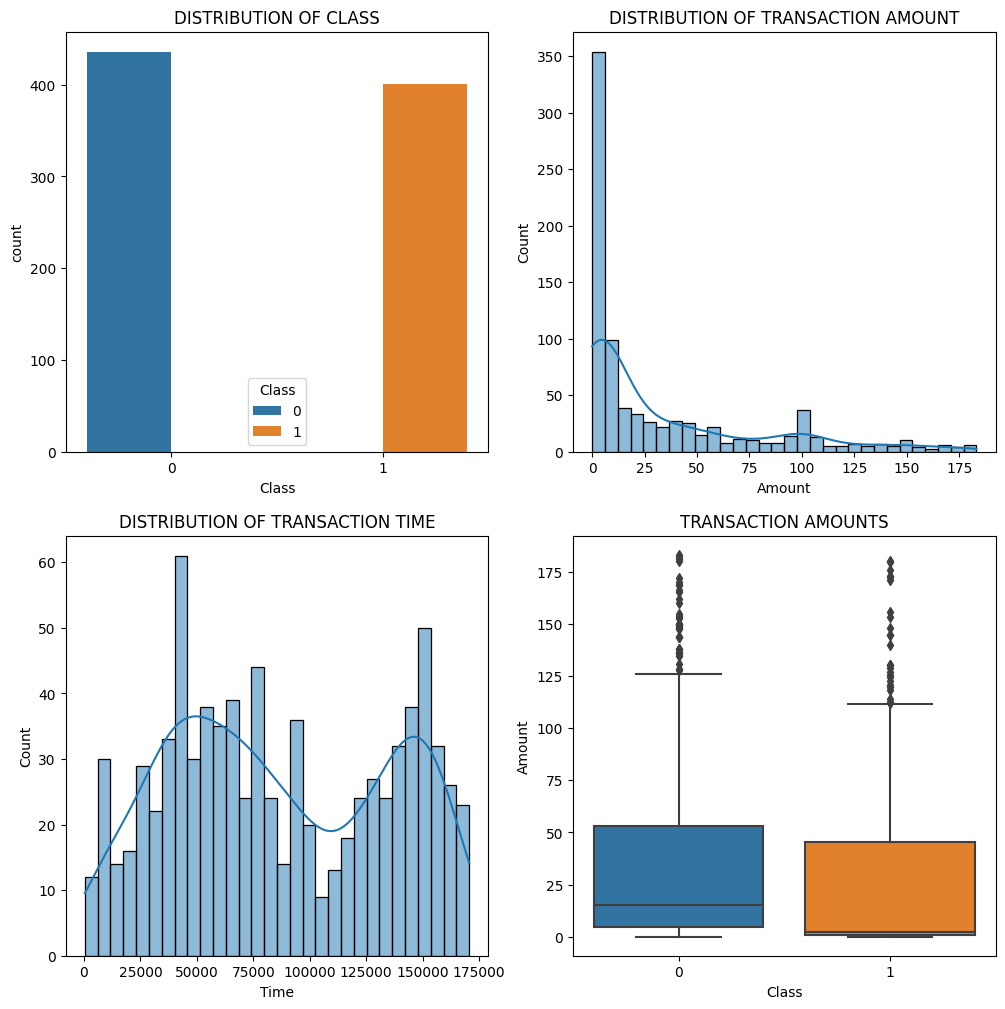

In [35]:
# Visualizing key statistics & distributions:
plt.figure(figsize=(12, 12))

# Class distribution (Countplot)
plt.subplot(2, 2, 1)
sns.countplot(x='Class', data=df1, hue='Class')
plt.title("DISTRIBUTION OF CLASS")

# Transaction amount distribution (Histogram with KDE)  
# kde - Kernel Density Estimate (Used to visualize the shape of the distribution )
plt.subplot(2, 2, 2)
sns.histplot(df1['Amount'], bins=30, kde=True)
plt.title("DISTRIBUTION OF TRANSACTION AMOUNT")

# Transaction time distribution (Histogram with KDE)
plt.subplot(2, 2, 3)
sns.histplot(df1['Time'], bins=30, kde=True)
plt.title("DISTRIBUTION OF TRANSACTION TIME")

# Boxplot of transaction amounts for each class
plt.subplot(2, 2, 4)
sns.boxplot(x='Class', y='Amount', data=df1)
plt.title("TRANSACTION AMOUNTS")

plt.show()

# Feature Engineering:

In [36]:
# Transaction hour: (Time in seconds) - If needed.
df1['TransactionHour'] = df1['Time']//3600

In [37]:
df1.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'TransactionHour'],
      dtype='object')

In [38]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,TransactionHour
1,152820.0,1.801430,0.097644,-0.420684,3.787639,0.456912,1.391565,-0.372614,0.328466,-0.391756,...,0.518605,0.019829,0.237727,0.131745,0.113939,-0.007840,-0.047842,36.89,0,42.0
2,122479.0,-1.042109,-1.405168,-0.058408,-2.483895,2.244787,0.415584,1.285391,-0.845543,-0.622843,...,1.658039,0.385463,-1.599866,-0.486913,-0.261441,-0.842093,-0.454102,40.00,0,34.0
3,115279.0,-0.743479,0.474773,0.714642,-0.047010,2.847280,4.559517,0.098784,1.052645,0.040837,...,-1.397913,-0.105400,0.628042,0.415781,-0.791232,0.202476,-0.082608,20.49,0,32.0
4,28702.0,-1.601299,-0.703948,1.006456,-0.335370,1.675296,-1.496368,0.468670,0.013343,-0.871681,...,-0.963278,0.421128,-0.033216,-0.174557,-0.050167,-0.057137,0.138125,95.90,0,7.0
5,9550.0,1.138400,0.035324,-0.107667,0.090731,0.143117,-0.340799,0.183940,-0.130753,0.943476,...,-1.208544,0.089969,-0.350830,0.097021,0.693169,-0.134318,-0.014121,64.62,0,2.0


# Model Selection, Training, Evaluation, Prediction:  
# (With Hyperparamter tuning)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Spliting into Features & Target:
X = df1.drop(columns=['TransactionHour', 'Class'], axis=1)
Y = df1['Class']

In [41]:
# Train-Test split:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
# stratify=Y- Helps maintaining the same proportion of classes in both the training & testing sets as in the original dataset. 

In [42]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1,152820.0,1.801430,0.097644,-0.420684,3.787639,0.456912,1.391565,-0.372614,0.328466,-0.391756,...,-0.192833,0.111775,0.518605,0.019829,0.237727,0.131745,0.113939,-0.007840,-0.047842,36.89
2,122479.0,-1.042109,-1.405168,-0.058408,-2.483895,2.244787,0.415584,1.285391,-0.845543,-0.622843,...,-0.253939,0.198926,1.658039,0.385463,-1.599866,-0.486913,-0.261441,-0.842093,-0.454102,40.00
3,115279.0,-0.743479,0.474773,0.714642,-0.047010,2.847280,4.559517,0.098784,1.052645,0.040837,...,0.361509,-0.598209,-1.397913,-0.105400,0.628042,0.415781,-0.791232,0.202476,-0.082608,20.49
4,28702.0,-1.601299,-0.703948,1.006456,-0.335370,1.675296,-1.496368,0.468670,0.013343,-0.871681,...,0.443957,-0.084619,-0.963278,0.421128,-0.033216,-0.174557,-0.050167,-0.057137,0.138125,95.90
5,9550.0,1.138400,0.035324,-0.107667,0.090731,0.143117,-0.340799,0.183940,-0.130753,0.943476,...,-0.028674,-0.442909,-1.208544,0.089969,-0.350830,0.097021,0.693169,-0.134318,-0.014121,64.62


In [43]:
Y.head()

1    0
2    0
3    0
4    0
5    0
Name: Class, dtype: int64

In [44]:
X.shape, Y.shape

((837, 30), (837,))

In [45]:
X_train.shape, X_test.shape

((669, 30), (168, 30))

In [46]:
Y_train.shape, Y_test.shape

((669,), (168,))

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
from sklearn.model_selection import GridSearchCV

# LogisticRegression
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(X_train, Y_train)

# RandomForestClassifier with GridSearchCV
rfc_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc_grid_search = GridSearchCV(RandomForestClassifier(random_state=2), rfc_param_grid, cv=5, scoring='accuracy')
rfc_grid_search.fit(X_train, Y_train)
best_rfc = rfc_grid_search.best_estimator_

# DecisionTreeClassifier with GridSearchCV
dtc_param_grid = {'max_depth': [3, 5, 7, 10]}
dtc_grid_search = GridSearchCV(DecisionTreeClassifier(), dtc_param_grid, cv=5, scoring='accuracy')
dtc_grid_search.fit(X_train, Y_train)
best_dtc = dtc_grid_search.best_estimator_

# Evaluate the models
lr_predictions = lr.predict(X_test)
dtc_predictions = best_dtc.predict(X_test)
rfc_predictions = best_rfc.predict(X_test)

# Print evaluation metrics for each model
print("\nLOGISTIC REGRESSION:")
print("Accuracy:", accuracy_score(Y_test, lr_predictions))
print("\nClassification Report:\n", classification_report(Y_test, lr_predictions))
print("Confusion Matrix:\n", confusion_matrix(Y_test, lr_predictions))
print("\n")
print("----------------------------------------------------------------------------")

print("\nRANDOM FOREST CLASSIFIER:")
print("Accuracy:", accuracy_score(Y_test, rfc_predictions))
print("\nClassification Report:\n", classification_report(Y_test, rfc_predictions))
print("Confusion Matrix:\n", confusion_matrix(Y_test, rfc_predictions))
print("\n")
print("----------------------------------------------------------------------------")

print("\nDECISION TREEE CLASSIFIER:")
print("Accuracy:", accuracy_score(Y_test, dtc_predictions))
print("\nClassification Report:\n", classification_report(Y_test, dtc_predictions))
print("Confusion Matrix:\n", confusion_matrix(Y_test, dtc_predictions))
print("\n")
print("----------------------------------------------------------------------------")


LOGISTIC REGRESSION:
Accuracy: 0.9226190476190477

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        88
           1       0.95      0.89      0.92        80

    accuracy                           0.92       168
   macro avg       0.92      0.92      0.92       168
weighted avg       0.92      0.92      0.92       168

Confusion Matrix:
 [[84  4]
 [ 9 71]]


----------------------------------------------------------------------------

RANDOM FOREST CLASSIFIER:
Accuracy: 0.9285714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.93        88
           1       0.97      0.88      0.92        80

    accuracy                           0.93       168
   macro avg       0.93      0.93      0.93       168
weighted avg       0.93      0.93      0.93       168

Confusion Matrix:
 [[86  2]
 [10 70]]


--------------------------------

__Accuracy: (TP + TN) / (TP + TN + FP + FN)__ <br>
The proportion of correctly classified instances out of the total instances.

__Precision (Positive Predictive Value): TP / (TP + FP)__ <br>
The proportion of correctly predicted positive instances out of the total predicted positive instances.

__Recall (Sensitivity, True Positive Rate): TP / (TP + FN)__ <br>
The proportion of actual positive instances that are correctly predicted.

__F1 Score: 2 * (Precision * Recall) / (Precision + Recall)__ <br>
The harmonic mean of precision and recall. It balances precision and recall.

__From the above observations of Accuracy, Precision, Recall & F1 score, we can opt for "DECISION TREE CLASSIFIER".__

# Predictive System:

In [50]:
def predict_fraud(input_data):
    # Assuming you have already trained best_dtc using DecisionTreeClassifier

    # Changing input data to a numpy array:
    input_data_as_numpy_array = np.asarray(input_data)

    # Reshaping the numpy array as we are predicting the label for only one instance:
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    # Making predictions using best_dtc
    prediction = best_dtc.predict(input_data_reshaped)

    # Output the prediction
    if prediction[0] == 0:
        return 'LEGIT TRANSACTION'
    else:
        return 'FRAUDULENT TRANSACTION'

In [51]:
input_data = [7, -0.89428608220282, 0.286157196276544, -0.113192212729871, -0.271526130088604, 2.6695986595986, 3.72181806112751, 0.370145127676916, 0.851084443200905, -0.392047586798604, -0.410430432848439, -0.705116586646536, -0.110452261733098, -0.286253632470583, 0.0743553603016731, -0.328783050303565, -0.210077268148783, -0.499767968800267, 0.118764861004217, 0.57032816746536, 0.0527356691149697, -0.0734251001059225, -0.268091632235551, -0.204232669947878, 1.0115918018785, 0.373204680146282, -0.384157307702294, 0.0117473564581996, 0.14240432992147, 93.2]

result = predict_fraud(input_data)
print(result)

LEGIT TRANSACTION


In [52]:
input_data = (28143, -27.14367842, 15.36580438, -28.40742446, 6.370895347, -20.08787757, -4.666313063, -18.70947882, 17.90357438, -3.722278738, -8.120961738, 4.419943456, -6.210941121, 1.063837395, -5.843528381, -0.108836449, -5.606597326, -11.75625561, -4.714946761, 0.783577594, 1.703887646, 1.796826389, -1.960973717, -0.902247452, 0.144011442, 2.024388039, -0.204214066, 1.332153059, 0.385890728, 99.99)

result = predict_fraud(input_data)
print(result)

FRAUDULENT TRANSACTION
